In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_human_bots_dataset.csv', index_col=0)

df.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,15/10/2016 21:32,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,7.874060e+17,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,09/11/2016 5:01,False,False,Photographing the American West since 1980. I ...,536,860,880,False,7.962160e+17,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,17/06/2017 5:34,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,8.759500e+17,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,21/07/2016 13:32,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,7.561200e+17,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,15/01/2012 16:32,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,4.647813e+08,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [3]:
df.shape

(37438, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37438 entries, 0 to 37437
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    37438 non-null  object 
 1   default_profile               37438 non-null  bool   
 2   default_profile_image         37438 non-null  bool   
 3   description                   30182 non-null  object 
 4   favourites_count              37438 non-null  int64  
 5   followers_count               37438 non-null  int64  
 6   friends_count                 37438 non-null  int64  
 7   geo_enabled                   37438 non-null  bool   
 8   id                            37438 non-null  float64
 9   lang                          29481 non-null  object 
 10  location                      37435 non-null  object 
 11  profile_background_image_url  32939 non-null  object 
 12  profile_image_url             37437 non-null  object 
 13  s

`followers_count` _=> Users following the specific user._

`friends_count` _=> Every user the specific user is following._

--------------------------------------------------------------------------------------------------------------------------------

**Columns that have unique values for each row are not going to be helpful to our model.**

In [5]:
df.id.nunique()

36967

In [6]:
df.screen_name.nunique()

37438

In [7]:
df.created_at.nunique()

37042

**Drop these columns**

In [8]:
df.drop(columns=['id', 'screen_name', 'created_at'], inplace=True)

**Replace Categorical variables with integers**

In [9]:
df['default_profile'].replace([True, False], [1, 0], inplace=True)

In [10]:
df['default_profile_image'].replace([True, False], [1, 0], inplace=True)

In [11]:
df['geo_enabled'].replace([True, False], [1, 0], inplace=True)

In [12]:
# Accounts that have a description are replaced with 1 while accounts without description are replaced with 0
df["description"] = df["description"].notnull().astype("int")

In [13]:
# Accounts that have a background image are replaced with 1 while accounts without an image are replaced with 0
df["profile_background_image_url"] = df["profile_background_image_url"].notnull().astype("int")

In [14]:
df['verified'].replace([True, False], [1, 0], inplace=True)

**Dropping columns**
* `lang` **:** A specific language does not really determine if the account is a bot.
* `location` **:** A real user might not set his location so it is difficult to tell.
* `profile_image_url` **:** 99.9% of accounts have a profile image.
* `account_age_days` **:** Same as `created_at`. This is not a determinant factor as to whether an account is a bot.

In [15]:
df.drop(columns=['lang', 'location', 'profile_image_url', 'account_age_days'], inplace=True)

In [16]:
df['account_type'].replace(['human', 'bot'], [1, 0], inplace=True)

In [17]:
df.head()

,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,profile_background_image_url,statuses_count,verified,average_tweets_per_day,account_type
0,0,0,1,4,1589,4,0,1,11041,0,7.870,0
1,0,0,1,536,860,880,0,1,252,0,0.183,1
2,0,0,1,3307,172,594,1,1,1001,0,0.864,1
3,1,0,1,8433,517,633,1,0,1324,0,0.889,1
4,0,0,1,88,753678,116,1,1,4202,1,1.339,1


Next:
* Scale columns down to between 0 and 1.
* Test different models. Remember to separate between training and test set and to test different parameters.
* KNN, Random Forest, Decision Trees, Naive Bayes
* What is Bag of words?

## Machine Learning

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [19]:
# standardize the columns to be between 0 and 1
df['favourites_count'] = (df['favourites_count'] - df['favourites_count'].min()) / (df['favourites_count'].max() - df['favourites_count'].min())
df['followers_count'] = (df['followers_count'] - df['followers_count'].min()) / (df['followers_count'].max() - df['followers_count'].min())
df['friends_count'] = (df['friends_count'] - df['friends_count'].min()) / (df['friends_count'].max() - df['friends_count'].min())
df['statuses_count'] = (df['statuses_count'] - df['statuses_count'].min()) / (df['statuses_count'].max() - df['statuses_count'].min())
df['average_tweets_per_day'] = (df['average_tweets_per_day'] - df['average_tweets_per_day'].min()) / (df['average_tweets_per_day'].max() - df['average_tweets_per_day'].min())

In [20]:
df.head()

,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,profile_background_image_url,statuses_count,verified,average_tweets_per_day,account_type
0,0,0,1,0.000005,0.000013,9.210096e-07,0,1,0.003983,0,0.006201,0
1,0,0,1,0.000606,0.000007,2.026221e-04,0,1,0.000091,0,0.000144,1
2,0,0,1,0.003736,0.000001,1.367699e-04,1,1,0.000361,0,0.000681,1
3,1,0,1,0.009527,0.000004,1.457498e-04,1,0,0.000478,0,0.000701,1
4,0,0,1,0.000099,0.006196,2.670928e-05,1,1,0.001516,1,0.001055,1


In [21]:
X = df.drop('account_type', axis=1)
y = df['account_type']

--------------------------------------------------------------------------------------------------------------------------------

In [22]:
# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## K Nearest Neighbors

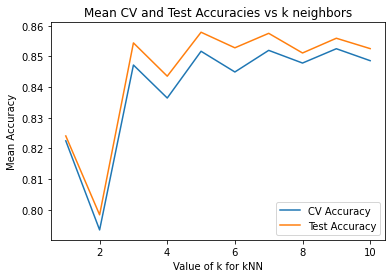

In [23]:
## Create helper function for plotting the training accuracy vs cross-validation accuracy plot with various k values

def k_neighbors(start, end, X, y, X_train, X_test, y_train, y_test):
    k_cross_val = []
    test_acc = []
    k_range = range(start, end+1)
    for k in range(start, end+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, knn.predict(X_test))
        scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        k_cross_val.append(scores.mean())
        test_acc.append(accuracy)
        
# plot graph to show best number of neighbors
    plt.title('Mean CV and Test Accuracies vs k neighbors')
    plt.plot(k_range, k_cross_val, label="CV Accuracy")
    plt.plot(k_range, test_acc, label="Test Accuracy")
    plt.legend()
    plt.xlabel('Value of k for kNN')
    plt.ylabel('Mean Accuracy')
    plt.show()

## Plot accuracies vs. k values
k_neighbors(1, 10, X, y, X_train, X_test, y_train, y_test)

The best number for k is 5 according to the plot displayed.

In [26]:
# create the model
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

# predict using unseen data
y_pred = knn.predict(X_test)

# compare and calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN's accuracy is {accuracy}")

KNN's accuracy is 0.8579059829059829


## Random Forest

In [27]:
# create the model
rf = RandomForestClassifier()

# fit the model
rf.fit(X_train, y_train)

# predict using unseen data
y_pred = rf.predict(X_test)

# compare and calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest's accuracy is {accuracy}")

Random Forest's accuracy is 0.8746438746438746


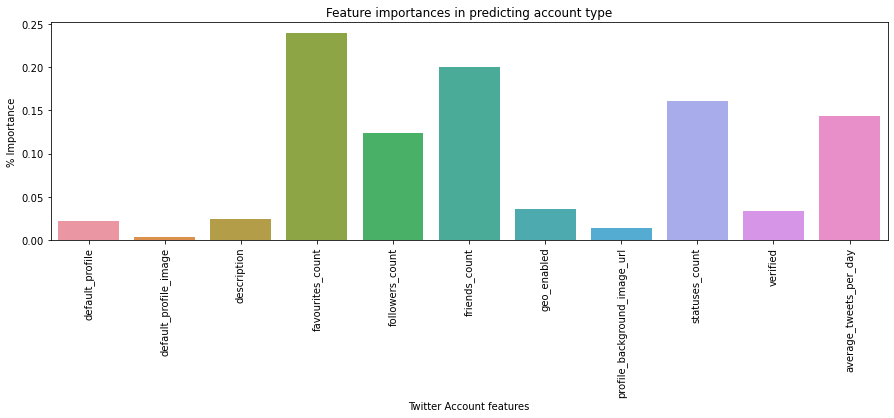

In [42]:
# plot feature importances using random forest method
figure(figsize=(15, 4))

# Plot the result.
sns.barplot(x=X.columns, y=rf.feature_importances_, ci=None);

# labels and title
plt.xticks(rotation=90);
plt.title('Feature importances in predicting account type');
plt.ylabel('% Importance');
plt.xlabel('Twitter Account features');

## Decision Trees

In [28]:
# create the model
dt = DecisionTreeClassifier()

# fit the model
dt.fit(X_train, y_train)

# predict using unseen data
y_pred = dt.predict(X_test)

# compare and calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree's accuracy is {accuracy}")

Decision Tree's accuracy is 0.8196225071225072


## Naive Bayes

In [34]:
# create the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

# predict using unseen data
y_pred = gnb.predict(X_test)

# compare and calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Naive Bayes' accuracy is {accuracy}")
# print(f"Number of correctly labeled points out of a total {X_test.shape[0]} points : {(y_test == y_pred).sum()}")

Naive Bayes' accuracy is 0.739761396011396
Number of correctly labeled points out of a total 11232 points : 8309
